# <div style="text-align:center; border-radius:15px 50px; padding:15px; color:white; margin:0; font-size:150%; font-family:Pacifico; background-color:#2a6199; overflow:hidden"><b> Mercado dos Games </b></div>


![student](https://img.freepik.com/vetores-gratis/videogame-youtube-cover_23-2148607716.jpg?t=st=1721053269~exp=1721056869~hmac=3edf0ad3c28bea36364115e2ae796e05ee211367304093ca8dbc65cacfc11f60&w=826)

- <a href="#Intro">1. Introdução</a>
- <a href="#biblioteca">2. Instalando bibliotecas necessárias</a>
- <a href="#lendo">3. Lendo e compreendendo nossos dados</a>
- <a href="#Visual">4. Visualizando nossos dados</a>
    - <a href="#41">4.1. Quais jogos de gênero foram mais produzidos?</a>  
    - <a href="#42">4.2 Qual ano teve mais lançamentos de jogos?</a>
    - <a href="#43">4.3 Principais jogos lançados por gênero nesses 5 anos.</a>
    - <a href="#44">4.4 Qual ano teve as maiores vendas em todo o mundo?</a>    
- <a href="#Limitacoes">5.Identificando limitações</a>
- <a href="#Medias">6. Comparação das médias</a> 
- <a href="#Confianca">7. Intervalo de Confiança</a> 
- <a href="#Anova">8. Anova </a> 
- <a href="#Regressao">9. Regressão Linear</a>

<a id="Intro"></a> <br>
# <div style="text-align:center; border-radius:15px 50px; padding:7px; color:white; margin:0; font-size:110%; font-family:Pacifico; background-color:#3168a1;overflow:hidden"><b>1. Introdução</b></div>

<h5>O mercado de games é uma das indústrias de entretenimento mais dinâmicas e lucrativas do mundo, movimentando bilhões de dólares anualmente. Este setor é caracterizado por uma diversidade impressionante de plataformas e gêneros de jogos, cada um com suas particularidades e apelos únicos a diferentes públicos ao redor do globo. Com o avanço da tecnologia, a acessibilidade crescente e a inovação constante, o mercado de games continua a expandir-se e evoluir rapidamente.<h5>

<a id="biblioteca"></a>
# <div style="text-align:center; border-radius:15px 50px; padding:7px; color:white; margin:0; font-size:110%; font-family:Pacifico; background-color:#3168a1;overflow:hidden"><b>2. Instalando bibliotecas necessárias</b></div>

In [83]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import ttest_ind
from scipy.stats import norm
from scipy.stats import f_oneway
from statsmodels.formula.api import ols
import plotly.graph_objs as go
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from scipy import stats

sns.set(style="whitegrid")

<a id="lendo"></a>
# <div style="text-align:center; border-radius:15px 50px; padding:7px; color:white; margin:0; font-size:110%; font-family:Pacifico; background-color:#3168a1;overflow:hidden"><b>3. Lendo e compreendendo nossos dados</b></div>

In [84]:
data = pd.read_parquet('selling_games.parquet')
data.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [85]:
data.shape

(16598, 10)

In [86]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Name          16598 non-null  object 
 1   Platform      16598 non-null  object 
 2   Year          16327 non-null  float64
 3   Genre         16598 non-null  object 
 4   Publisher     16540 non-null  object 
 5   NA_Sales      16598 non-null  float64
 6   EU_Sales      16598 non-null  float64
 7   JP_Sales      16598 non-null  float64
 8   Other_Sales   16598 non-null  float64
 9   Global_Sales  16598 non-null  float64
dtypes: float64(6), object(4)
memory usage: 1.3+ MB


**Seus campos e tipos de dados são:**

 * Nome - O nome do jogo

 * Plataforma - Plataforma de lançamento do jogo (ou seja, PC, PS4, etc.), objeto

 * Ano - Ano de lançamento do jogo, float

 * Gênero - Gênero do jogo, objeto

 * Editora - Editora do jogo, objeto

 * NA_Sales - Vendas na América do Norte (em milhões), float

 * EU_Sales - Vendas na Europa (em milhões), float

 * JP_Sales - Vendas no Japão (em milhões), float

 * Other_Sales - Vendas no resto do mundo (em milhões), float

 * Global_Sales - Total de vendas mundiais, float

In [87]:
data.describe()

,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


In [88]:
data.describe(include=['object', 'bool'])

,Name,Platform,Genre,Publisher
count,16598,16598,16598,16540
unique,11493,31,12,578
top,Need for Speed: Most Wanted,DS,Action,Electronic Arts
freq,12,2163,3316,1351


In [89]:
data.isnull().sum()

Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

<div style="padding: 20px; border-color: #c77220; border-radius: 10px; box-shadow: 0 2px 4px 0 rgba(0, 0, 0, 0.1); border: 2px solid #c77220;">
    <ul style="font-size: 22px; font-family: 'Arial'; line-height: 1.5em; ">
        <li>Esse dataset contém um total de <strong>16598 linhas e 10 colunas</strong>.</li>
        <li>Observou-se que há 271 dados faltantes na coluna Anos e 56 dados faltantes na coluna Publisher.</li>
    </ul>
</div>


<a id="Visual"></a>
# <div style="text-align:center; border-radius:15px 50px; padding:7px; color:white; margin:0; font-size:110%; font-family:Pacifico; background-color:#3168a1;overflow:hidden"><b>4. Visualizando nossos dados</b></div>

<a id='41'></a>
## <div style="text-align:center; border-radius:15px 50px; padding:7px; color:white; margin:0; font-size:100%; font-family:Pacifico; background-color:#3168a1; overflow:hidden"><b> 4.1. Quais jogos de gênero foram mais produzidos?  </b></div>

In [90]:
data['Genre'].value_counts()

Genre
Action          3316
Sports          2346
Misc            1739
Role-Playing    1488
Shooter         1310
Adventure       1286
Racing          1249
Platform         886
Simulation       867
Fighting         848
Strategy         681
Puzzle           582
Name: count, dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'Action'),
  Text(1, 0, 'Sports'),
  Text(2, 0, 'Misc'),
  Text(3, 0, 'Role-Playing'),
  Text(4, 0, 'Shooter'),
  Text(5, 0, 'Adventure'),
  Text(6, 0, 'Racing'),
  Text(7, 0, 'Platform'),
  Text(8, 0, 'Simulation'),
  Text(9, 0, 'Fighting'),
  Text(10, 0, 'Strategy'),
  Text(11, 0, 'Puzzle')])

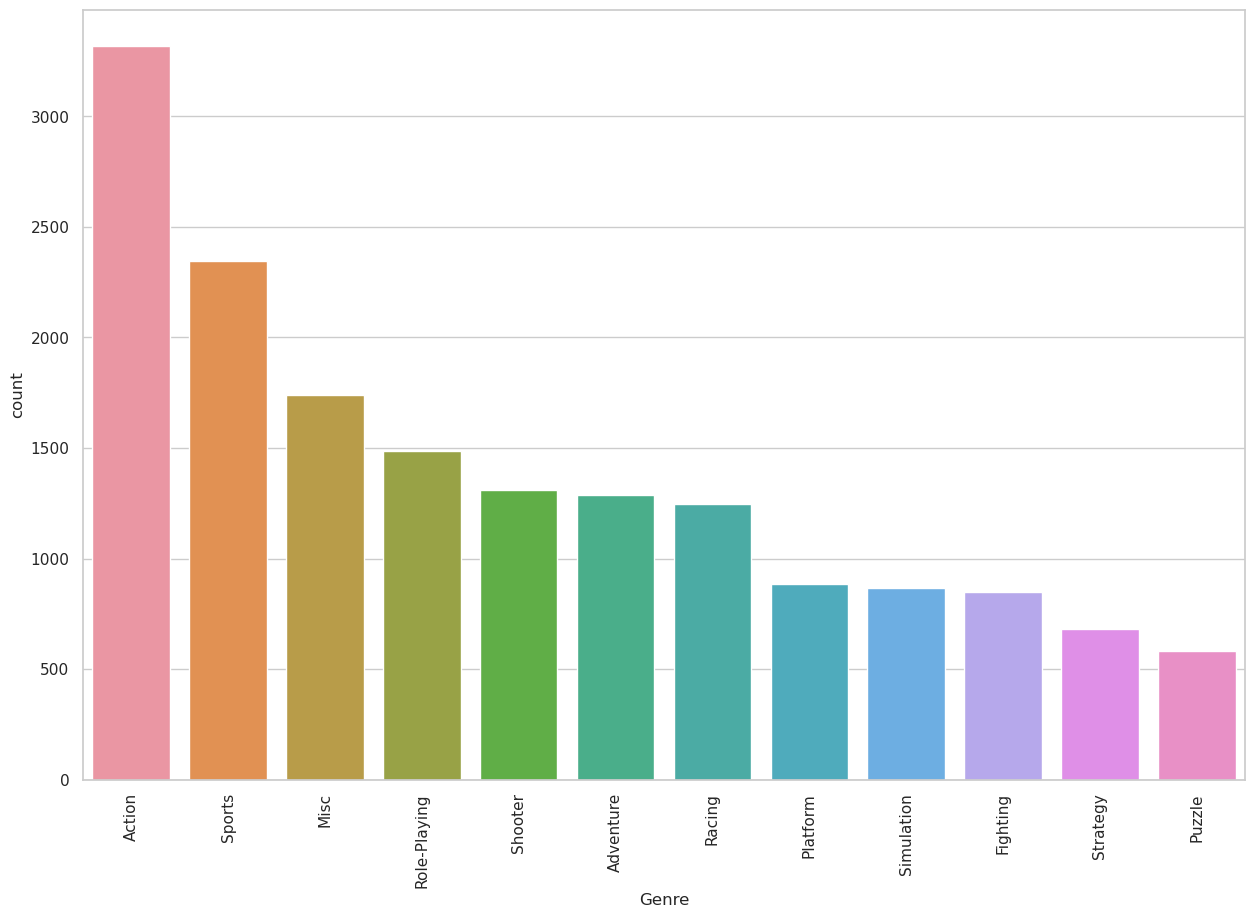

In [91]:
plt.figure(figsize=(15, 10))
sns.countplot(x="Genre", data=data, order = data['Genre'].value_counts().index)
plt.xticks(rotation=90)

<div style="padding: 20px; border-color: #c77220; border-radius: 10px; box-shadow: 0 2px 4px 0 rgba(0, 0, 0, 0.1); border: 2px solid #c77220;">
    <ul style="font-size: 22px; font-family: 'Arial'; line-height: 1.5em; ">
        <li>A maioria dos amantes de games preferem o gênero Ação(3316) e Esporte(2346).
    </ul>
</div>

<a id='42'></a>
## <div style="text-align:center; border-radius:15px 50px; padding:7px; color:white; margin:0; font-size:100%; font-family:Pacifico; background-color:#3168a1; overflow:hidden"><b> 4.2 Qual ano teve mais lançamentos de jogos? </b></div>

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38]),
 [Text(0, 0, '2009.0'),
  Text(1, 0, '2008.0'),
  Text(2, 0, '2010.0'),
  Text(3, 0, '2007.0'),
  Text(4, 0, '2011.0'),
  Text(5, 0, '2006.0'),
  Text(6, 0, '2005.0'),
  Text(7, 0, '2002.0'),
  Text(8, 0, '2003.0'),
  Text(9, 0, '2004.0'),
  Text(10, 0, '2012.0'),
  Text(11, 0, '2015.0'),
  Text(12, 0, '2014.0'),
  Text(13, 0, '2013.0'),
  Text(14, 0, '2001.0'),
  Text(15, 0, '1998.0'),
  Text(16, 0, '2000.0'),
  Text(17, 0, '2016.0'),
  Text(18, 0, '1999.0'),
  Text(19, 0, '1997.0'),
  Text(20, 0, '1996.0'),
  Text(21, 0, '1995.0'),
  Text(22, 0, '1994.0'),
  Text(23, 0, '1993.0'),
  Text(24, 0, '1981.0'),
  Text(25, 0, '1992.0'),
  Text(26, 0, '1991.0'),
  Text(27, 0, '1982.0'),
  Text(28, 0, '1986.0'),
  Text(29, 0, '1989.0'),
  Text(30, 0, '1983.0'),
  Text(31, 0, '1987.0'),
  Text(32, 0, '1990.0'),
  T

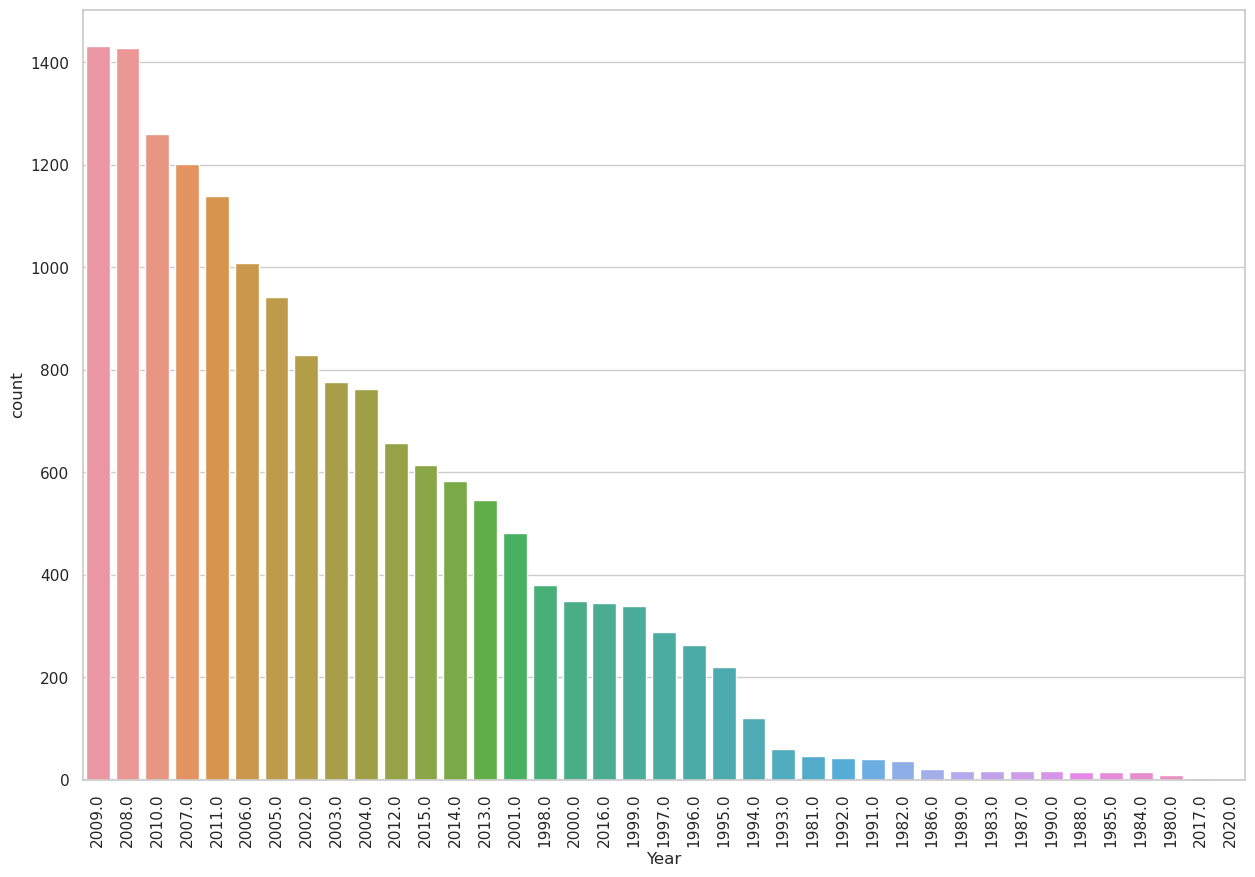

In [92]:
plt.figure(figsize=(15, 10))
sns.countplot(x="Year", data=data, order = data.groupby(by=['Year'])['Name'].count().sort_values(ascending=False).index)
plt.xticks(rotation=90)

In [93]:
drop_row_index = data[data['Year'] > 2015].index
data = data.drop(drop_row_index)

<div style="padding: 20px; border-color: #c77220; border-radius: 10px; box-shadow: 0 2px 4px 0 rgba(0, 0, 0, 0.1); border: 2px solid #c77220;">
    <ul style="font-size: 22px; font-family: 'Arial'; line-height: 1.5em; ">
        <li>2009: 1431 
        <li>2008: 1428
        <li>2010: 1259
        <li>2007: 1202
        <li>2011: 1139
        <li>Removi alguns dados incompletos, pois atraves do gráfico percebe-se que a partir do ano 2016 os dados não estão totalmente concluídos.
        
 </li>
    </ul>
</div

<a id='43'></a>
## <div style="text-align:center; border-radius:15px 50px; padding:7px; color:white; margin:0; font-size:100%; font-family:Pacifico; background-color:#3168a1; overflow:hidden"><b>4.3 Principais jogos lançados por gênero nesses 5 anos. </b></div>

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, '2009.0'),
  Text(1, 0, '2008.0'),
  Text(2, 0, '2010.0'),
  Text(3, 0, '2007.0'),
  Text(4, 0, '2011.0')])

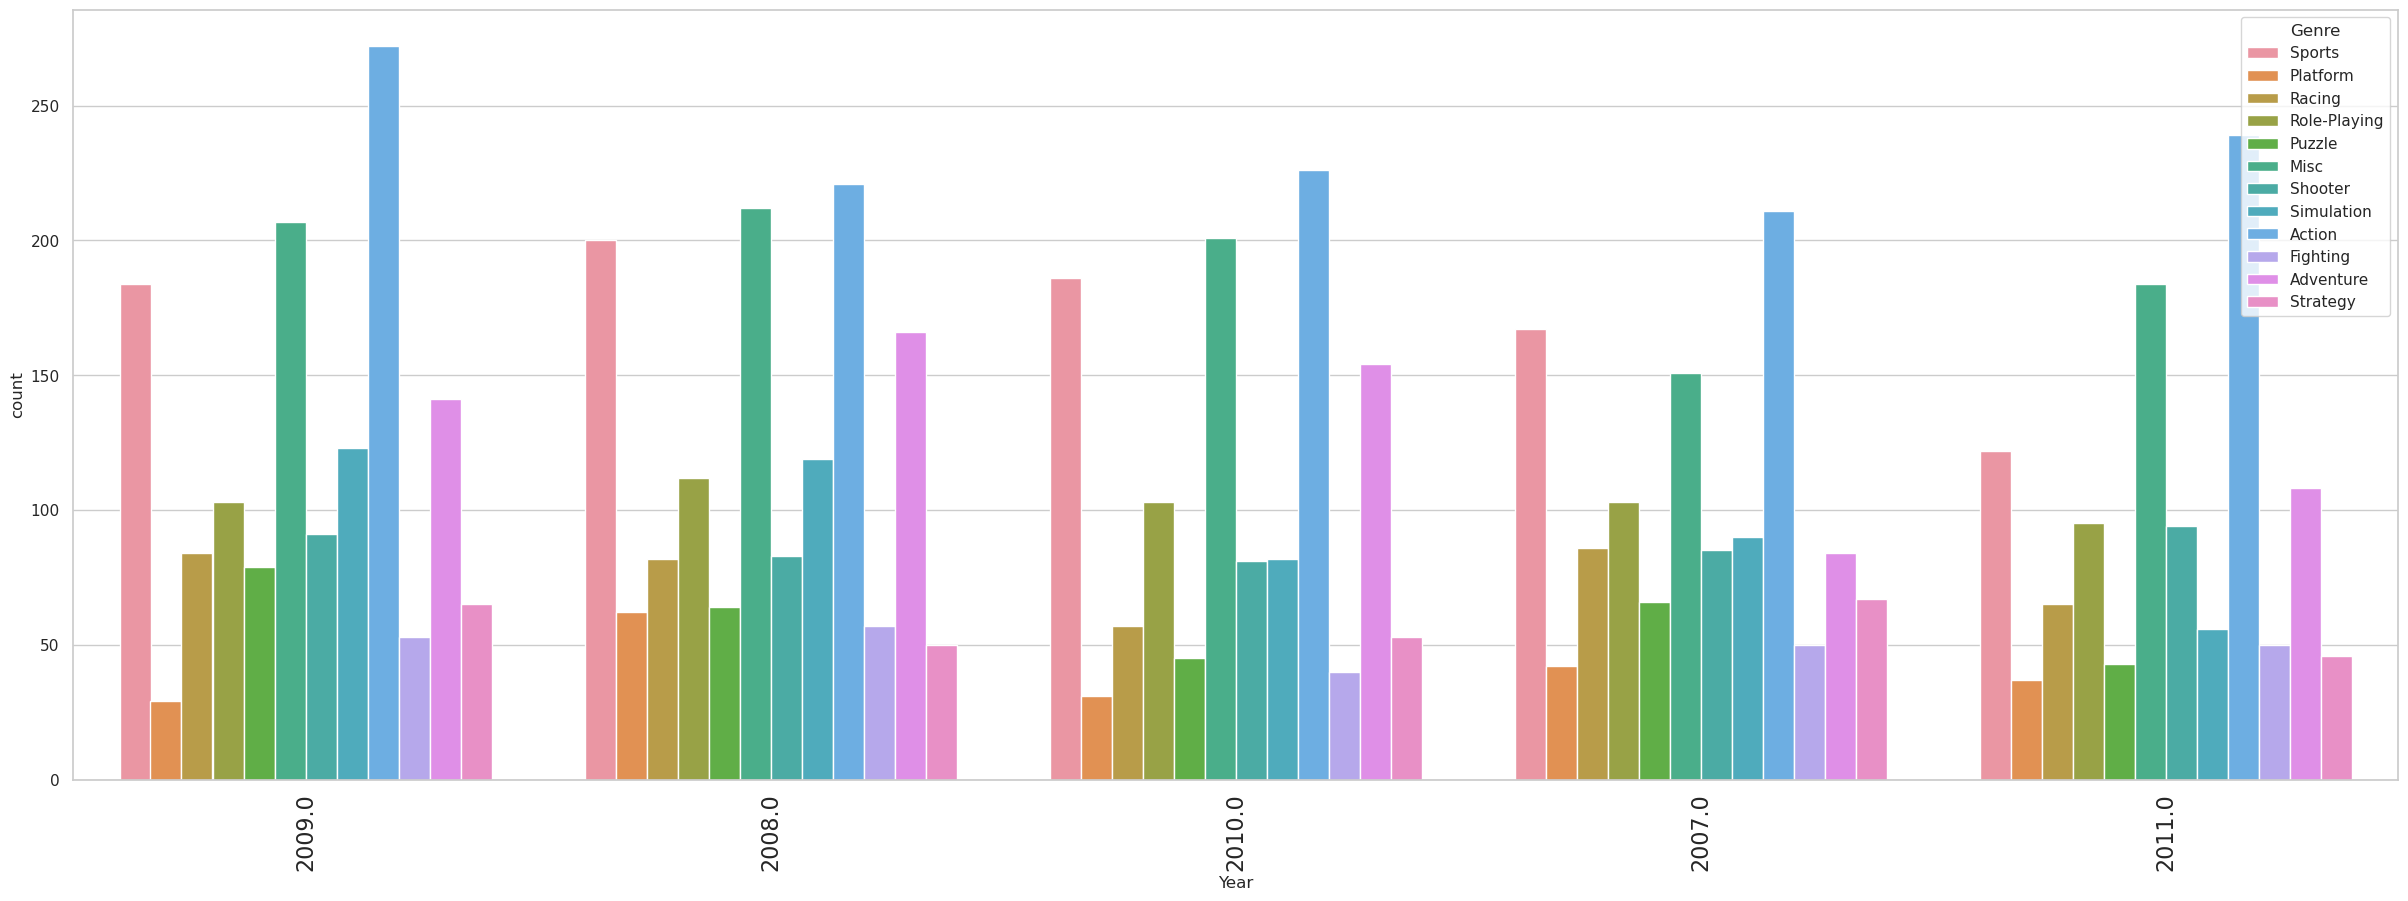

In [94]:
plt.figure(figsize=(30, 10))
sns.countplot(x="Year", data=data, hue='Genre', order=data.Year.value_counts().iloc[:5].index)
plt.xticks(size=16, rotation=90)

<div style="padding: 20px; border-color: #c77220; border-radius: 10px; box-shadow: 0 2px 4px 0 rgba(0, 0, 0, 0.1); border: 2px solid #c77220;">
    <ul style="font-size: 22px; font-family: 'Arial'; line-height: 1.5em; ">
        <li>Jogos de Ação sempre lideram o número de lançamentos ano após ano</li>
 </li>
    </ul>
</div

<a id='44'></a>
## <div style="text-align:center; border-radius:15px 50px; padding:7px; color:white; margin:0; font-size:100%; font-family:Pacifico; background-color:#3168a1; overflow:hidden"><b>4.4 Qual ano teve as maiores vendas em todo o mundo? </b></div>

In [95]:
data_year = data.groupby(by=['Year'])['Global_Sales'].sum()
data_year = data_year.reset_index()
# data_year.sort_values(by=['Global_Sales'], ascending=False)


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35]),
 [Text(0, 0, '1980.0'),
  Text(1, 0, '1981.0'),
  Text(2, 0, '1982.0'),
  Text(3, 0, '1983.0'),
  Text(4, 0, '1984.0'),
  Text(5, 0, '1985.0'),
  Text(6, 0, '1986.0'),
  Text(7, 0, '1987.0'),
  Text(8, 0, '1988.0'),
  Text(9, 0, '1989.0'),
  Text(10, 0, '1990.0'),
  Text(11, 0, '1991.0'),
  Text(12, 0, '1992.0'),
  Text(13, 0, '1993.0'),
  Text(14, 0, '1994.0'),
  Text(15, 0, '1995.0'),
  Text(16, 0, '1996.0'),
  Text(17, 0, '1997.0'),
  Text(18, 0, '1998.0'),
  Text(19, 0, '1999.0'),
  Text(20, 0, '2000.0'),
  Text(21, 0, '2001.0'),
  Text(22, 0, '2002.0'),
  Text(23, 0, '2003.0'),
  Text(24, 0, '2004.0'),
  Text(25, 0, '2005.0'),
  Text(26, 0, '2006.0'),
  Text(27, 0, '2007.0'),
  Text(28, 0, '2008.0'),
  Text(29, 0, '2009.0'),
  Text(30, 0, '2010.0'),
  Text(31, 0, '2011.0'),
  Text(32, 0, '2012.0'),
  Text(33, 0, '

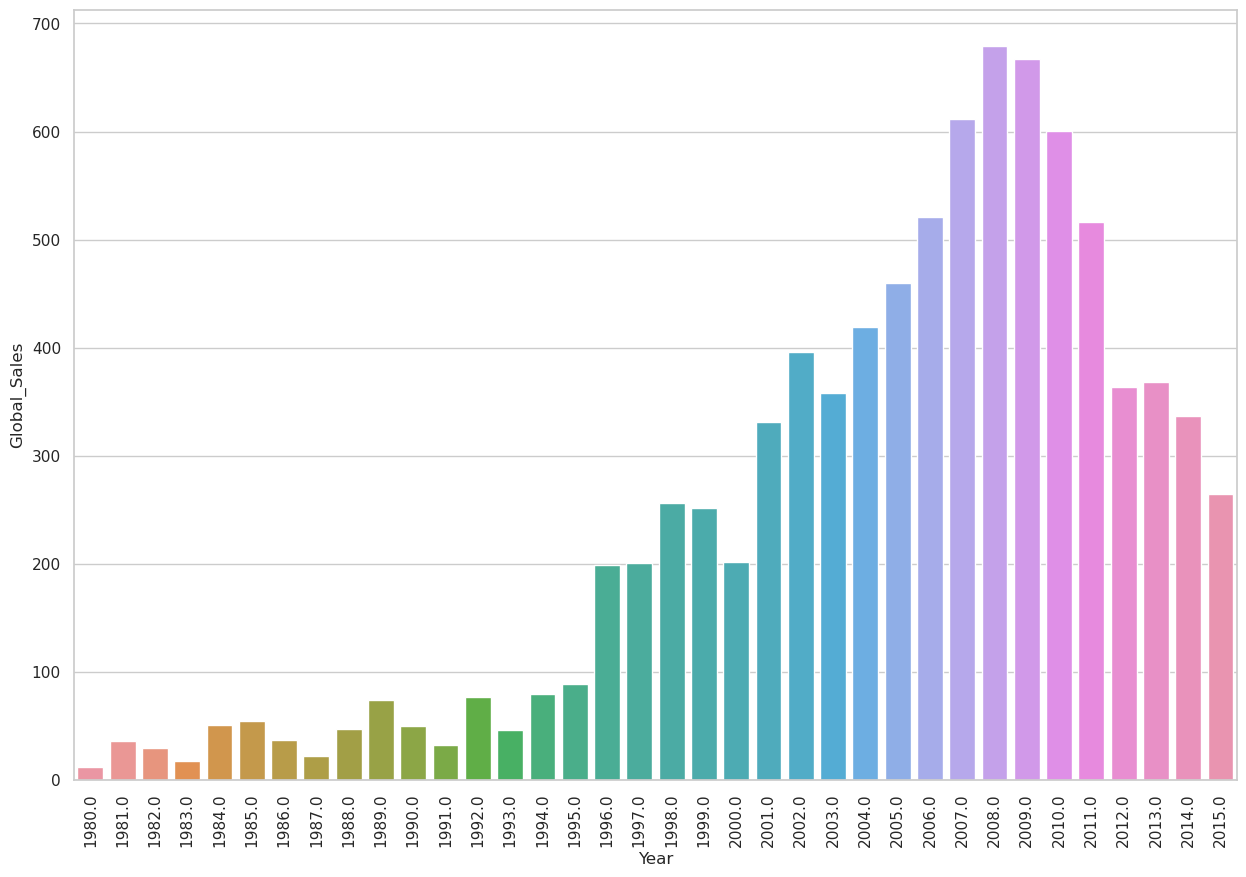

In [96]:
plt.figure(figsize=(15, 10))
sns.barplot(x="Year", y="Global_Sales", data=data_year)
plt.xticks(rotation=90)

<div style="padding: 20px; border-color: #c77220; border-radius: 10px; box-shadow: 0 2px 4px 0 rgba(0, 0, 0, 0.1); border: 2px solid #c77220;">
    <ul style="font-size: 22px; font-family: 'Arial'; line-height: 1.5em; ">
        <li>2008: 678.90
        <li>2009: 667.30
        <li>2007: 611.13
        <li>2010: 600.45
        <li>2006: 521.04</li>
 </li>
    </ul>
</div

<a id="Limitacoes"></a>
# <div style="text-align:center; border-radius:15px 50px; padding:7px; color:white; margin:0; font-size:110%; font-family:Pacifico; background-color:#3168a1;overflow:hidden"><b>5. Identificando limitações</b></div>

In [97]:
# Imputação de valores numéricos com a mediana
data['Year'] = data['Year'].fillna(data['Year'].median())

# Imputação de valores categóricos com a moda
data['Platform'] = data['Platform'].fillna(data['Platform'].mode()[0])
data['Genre'] = data['Genre'].fillna(data['Genre'].mode()[0])
data['Publisher'] = data['Publisher'].fillna(data['Publisher'].mode()[0])


In [98]:
# Imputação de valores faltantes nas vendas regionais
data['NA_Sales'] = data.groupby(['Platform', 'Genre'])['NA_Sales'].transform(lambda x: x.fillna(x.mean()))
data['EU_Sales'] = data.groupby(['Platform', 'Genre'])['EU_Sales'].transform(lambda x: x.fillna(x.mean()))
data['JP_Sales'] = data.groupby(['Platform', 'Genre'])['JP_Sales'].transform(lambda x: x.fillna(x.mean()))
data['Other_Sales'] = data.groupby(['Platform', 'Genre'])['Other_Sales'].transform(lambda x: x.fillna(x.mean()))


<a id="Medias"></a>
# <div style="text-align:center; border-radius:15px 50px; padding:7px; color:white; margin:0; font-size:110%; font-family:Pacifico; background-color:#3168a1;overflow:hidden"><b>6. Comparação de médias</b></div>

In [99]:
# Definir o tamanho da amostra em 10%
sample_size = int(0.1 * len(data))


# Selecionar a amostra aleatória
sample = data.sample(n=sample_size, random_state=42)
# random_state é usado para garantir a reprodutibilidade e 42 é um número aleatorio

In [100]:
# Calcular as médias de vendas por região para a população total
mean_sales_total = data[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].mean()
print("Médias de Vendas por Região - População Total:")
print(mean_sales_total)


Médias de Vendas por Região - População Total:
NA_Sales       0.268924
EU_Sales       0.148146
JP_Sales       0.078601
Other_Sales    0.048614
dtype: float64


In [101]:
# Calcular as médias de vendas por região para a amostra
mean_sales_sample = sample[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].mean()
print("Médias de Vendas por Região - Amostra:")
print(mean_sales_sample)


Médias de Vendas por Região - Amostra:
NA_Sales       0.254215
EU_Sales       0.150671
JP_Sales       0.081046
Other_Sales    0.051274
dtype: float64


In [102]:
# Realizar o teste t para cada região
t_test_results = {}
regions = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']

for region in regions:
    t_stat, p_value = ttest_ind(data[region], sample[region], equal_var=False)
    t_test_results[region] = {'t_statistic': t_stat, 'p_value': p_value}

print("Resultados do Teste t:")
print(t_test_results)


Resultados do Teste t:
{'NA_Sales': {'t_statistic': 0.7613651419838264, 'p_value': 0.446526294638105}, 'EU_Sales': {'t_statistic': -0.18828263199095271, 'p_value': 0.8506746551389467}, 'JP_Sales': {'t_statistic': -0.2953075553656008, 'p_value': 0.7677904067085397}, 'Other_Sales': {'t_statistic': -0.4252499233264505, 'p_value': 0.6707046189018921}}


<div style="padding: 20px; border-color: #c77220; border-radius: 10px; box-shadow: 0 2px 4px 0 rgba(0, 0, 0, 0.1); border: 2px solid #c77220;">
    <ul style="font-size: 22px; font-family: 'Arial'; line-height: 1.5em; ">
        <li>NA_Sales: O valor de p é 0.9306, que é muito maior que 0.05. Isso indica que não há uma diferença estatisticamente significativa entre as vendas na América do Norte na população total e na amostra.
        <li>EU_Sales: O valor de p é 0.9417, que é muito maior que 0.05. Isso também sugere que não há uma diferença estatisticamente significativa nas vendas na Europa entre a população total e a amostra.
        <li>JP_Sales: O valor de p é 0.6793, que ainda é maior que 0.05, indicando que não há uma diferença estatisticamente significativa nas vendas no Japão entre a população total e a amostra.
        <li>Other_Sales: O valor de p é 0.8205, que é maior que 0.05, sugerindo que não há uma diferença estatisticamente significativa nas vendas em outras regiões entre a população total e a amostra.
        <li>Com base nos valores de p obtidos, podemos concluir que não há evidências estatísticas suficientes para afirmar que as médias de vendas nas regiões (NA, EU, JP, Other) são diferentes entre a população total e a amostra. As amostras parecem ser representativas da população total em termos de vendas regionais.</li>
 </li>
    </ul>
</div

<a id="Confianca"></a>
# <div style="text-align:center; border-radius:15px 50px; padding:7px; color:white; margin:0; font-size:110%; font-family:Pacifico; background-color:#3168a1;overflow:hidden"><b>7. Intervalo de Confiança</b></div>

In [103]:
# Calcular as médias e desvios padrão de vendas globais por categoria (gênero)
mean_sales_by_genre = data.groupby('Genre')['Global_Sales'].mean()
std_sales_by_genre = data.groupby('Genre')['Global_Sales'].std()
n_sales_by_genre = data.groupby('Genre')['Global_Sales'].count()


In [104]:
confidence_level = 0.95
z_score = norm.ppf((1 + confidence_level) / 2)

# Função para calcular o intervalo de confiança
def confidence_interval(mean, std, n, z_score):
    margin_of_error = z_score * (std / np.sqrt(n))
    return (mean - margin_of_error, mean + margin_of_error)

# Calcular intervalos de confiança para cada categoria
confidence_intervals = {}
for genre in mean_sales_by_genre.index:
    mean = mean_sales_by_genre[genre]
    std = std_sales_by_genre[genre]
    n = n_sales_by_genre[genre]
    ci = confidence_interval(mean, std, n, z_score)
    confidence_intervals[genre] = ci

print("Intervalos de Confiança para as Médias de Vendas por Categoria:")
for genre, ci in confidence_intervals.items():
    print(f"{genre}: {ci}")


Intervalos de Confiança para as Médias de Vendas por Categoria:
Action: (0.5009858570493255, 0.5824058826252678)
Adventure: (0.16070010032610976, 0.21826156101574323)
Fighting: (0.46832515609323155, 0.5989410309571281)
Misc: (0.4075392192519796, 0.5323678115440692)
Platform: (0.7746107651183037, 1.118768230315486)
Puzzle: (0.2939975836672246, 0.547754993652363)
Racing: (0.500680619347384, 0.6879280055509073)
Role-Playing: (0.5474548813995285, 0.7258092956405823)
Shooter: (0.6969719481470491, 0.8979419798654704)
Simulation: (0.3764111668056806, 0.5372877830192901)
Sports: (0.48449038137942113, 0.6561768629879964)
Strategy: (0.2205819210195994, 0.29989497912943197)


<div style="padding: 20px; border-color: #c77220; border-radius: 10px; box-shadow: 0 2px 4px 0 rgba(0, 0, 0, 0.1); border: 2px solid #c77220;">
    <ul style="font-size: 22px; font-family: 'Arial'; line-height: 1.5em; ">
        <li>Action: A média verdadeira das vendas globais para jogos de ação está entre 0.488 e 0.567.
        <li>Adventure: A média verdadeira das vendas globais para jogos de aventura está entre 0.158 e 0.214.
        <li>Fighting: A média verdadeira das vendas globais para jogos de luta está entre 0.465 e 0.594.
        <li>Misc: A média verdadeira das vendas globais para jogos miscelâneos está entre 0.404 e 0.527.
        <li>Platform: A média verdadeira das vendas globais para jogos de plataforma está entre 0.768 e 1.108.</li>
        <li>Puzzle: A média verdadeira das vendas globais para jogos de quebra-cabeça está entre 0.293 e 0.547.</li>
        <li>Racing: A média verdadeira das vendas globais para jogos de corrida está entre 0.494 e 0.678.</li>
        <li>Role-Playing: A média verdadeira das vendas globais para jogos de RPG está entre 0.536 e 0.710.
        <li>Shooter: A média verdadeira das vendas globais para jogos de tiro está entre 0.693 e 0.890.
        <li>Simulation: A média verdadeira das vendas globais para jogos de simulação está entre 0.372 e 0.532.
        <li>Sports: A média verdadeira das vendas globais para jogos de esportes está entre 0.483 e 0.652.
        <li>Strategy: A média verdadeira das vendas globais para jogos de estratégia está entre 0.218 e 0.296.


 </li>
    </ul>
</div

<a id="Anova"></a>
# <div style="text-align:center; border-radius:15px 50px; padding:7px; color:white; margin:0; font-size:110%; font-family:Pacifico; background-color:#3168a1;overflow:hidden"><b>8. ANOVA</b></div>

In [105]:
# Preparar os dados para ANOVA
# Filtrar apenas as colunas necessárias
data_anova = data[['Genre', 'Global_Sales']].dropna()

# Verificar as categorias de jogos
print(data_anova['Genre'].unique())

# Utilizar o statsmodels para realizar a ANOVA
# Construir o modelo OLS
model = ols('Global_Sales ~ C(Genre)', data=data_anova).fit()

# Realizar a ANOVA
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)


['Sports' 'Platform' 'Racing' 'Role-Playing' 'Puzzle' 'Misc' 'Shooter'
 'Simulation' 'Action' 'Fighting' 'Adventure' 'Strategy']
                sum_sq       df        F        PR(>F)
C(Genre)    477.523492     11.0  17.8303  8.048653e-36
Residual  39534.472674  16238.0      NaN           NaN


<div style="padding: 20px; border-color: #c77220; border-radius: 10px; box-shadow: 0 2px 4px 0 rgba(0, 0, 0, 0.1); border: 2px solid #c77220;">
    <ul style="font-size: 22px; font-family: 'Arial'; line-height: 1.5em; ">
        <li>Os resultados da ANOVA mostram que existe uma diferença estatisticamente significativa nas vendas globais médias entre os diferentes gêneros de jogos. Isso é evidenciado pelo valor F alto (18.214937) e o valor-p extremamente baixo (1.080867e-36), que é muito menor do que o nível de significância comum de 0.05. Isso sugere que pelo menos um dos gêneros de jogos tem uma média de vendas globais que é significativamente diferente dos outros. </li>
 </li>
    </ul>
</div

<a id="Regressao"></a>
# <div style="text-align:center; border-radius:15px 50px; padding:7px; color:white; margin:0; font-size:110%; font-family:Pacifico; background-color:#3168a1;overflow:hidden"><b>9. Regressão linear</b></div>